In [214]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [215]:
# mi i s our prior for probability pi; since we assume it constant, we take m to be uniform => mi = 1/100.
mi = 1/100
# M is the total number of outcomes
M = 100
# average result
avg_res = 10

We use the method of maximum entropy. Using Lagrange multipliers, the parameter $\lambda_1$ that maximizes the entropy $S$ can be found through: 

$$ dS - \lambda C_0 - \lambda_1 C_1, \hspace{10px} S = - \sum_i p_i \ln{\frac{p_i}{m_i}} \rightarrow$$
$$ d\left[- \sum_i p_i \ln{\frac{p_i}{m_i}} - \lambda \left(\sum_i p_i - 1\right) - \lambda_1 \left(\sum_i i p_i - 10\right)   \right] = 0.$$

We have the freedom to choose $\lambda$ such that one of these terms is 0. Then, for each of the other terms, we require: 

$$-\ln{p_i/m_i} - 1 (should be m_i!) - \lambda - \lambda_i i = 0\rightarrow  p_i = m_i e^{-(1+\lambda)} e^{-\lambda_1 i}$$

We have two conditions: 

$$ 1) \hspace{10px} \sum_i p_i = 1 = e^{-(1+\lambda)} \sum_i m_i e^{-\lambda_1 i}\rightarrow e^{-(1+\lambda)} = \frac{1}{\sum_i^M m_i e^{-\lambda_1 i}}, $$
$$ 2) \hspace{10px} \sum_i i p_i = 10 = e^{-(1+\lambda)} \sum_i i m_i e^{-\lambda_1 i}  $$
Where $i$ is both the index and the value of the die for outcome $i$. This gives us:

$$ 10 = \frac{\sum_j^M j m_j e^{-\lambda_1 j}}{\sum_i^M m_i e^{-\lambda_1 i}}.$$

Also, utilize that $m_i = m_j = $ constant. Thus, our final expression for the $\lambda_1$ which maximizes our entropy is given by solving: 

$$ 10 = \frac{\sum_j^M je^{-\lambda_1 j}}{\sum_i^M e^{-\lambda_1 i}} \rightarrow \sum_j^M je^{-\lambda_1 j} - 10 \sum_i^M e^{-\lambda_1 i} = 0.$$

In [216]:
def max_ent_equation(lambda_1, target, M):
    '''
    Returns the difference between the value of the final equation for lambda_1 and it's target. 
    Here, the target is target = 10, and M = 100 (the number of discrete outcomes).
    '''
    sum_1 = np.sum([j*np.exp(-lambda_1*j) for j in range(1,M+1)])  # M points between 1 and 100
    sum_2 = np.sum([np.exp(-lambda_1*i) for i in range(1,M+1)])
    return sum_1-target*sum_2

# Test
print(f'Max entropy equation passing unit test: {-0.368==np.round((max_ent_equation(1,2,2)),3)}')

Max entropy equation passing unit test: True


In [217]:
# Use scipy.optimize.fsolve to solve this equation - fsolve finds the zero point
lambda_1 = opt.fsolve(func=max_ent_equation, x0=-1, args=(avg_res, M))
lambda_1 = lambda_1[0]
print(f'The solution for lambda_1 is lambda_1 = {(lambda_1):.2f}.')

The solution for lambda_1 is lambda_1 = 0.11.


Use this lambda 1 to evaluate $$e^{-(1+\lambda)} = \frac{1}{\sum_i^M m_i e^{-\lambda_1 i}}.$$


In [218]:
def e_power_lambda(lambda_1, mi, M):
    return 1/(np.sum([mi*np.exp(-lambda_1*i) for i in range(1,M+1)]))

# Test
print(f'e^(-(1+lambda)) passes unit tests: {0.994==np.round((e_power_lambda(1,2,2)),3)}')

e^(-(1+lambda)) passes unit tests: True


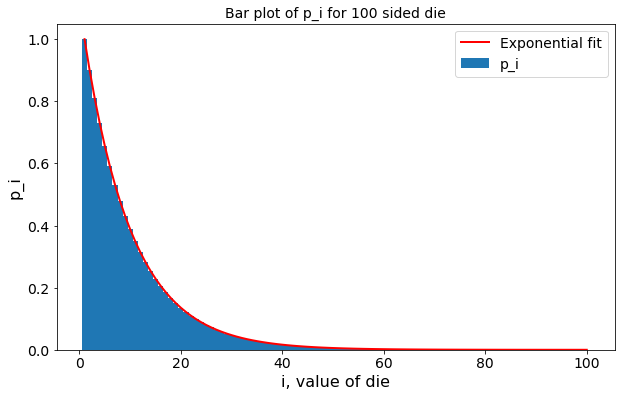

In [219]:
e_pow_lambda=e_power_lambda(lambda_1,mi,1)

# Now, finally, calculate our probabilities p_i and make a bar plot
p_i_s = np.array([mi * e_pow_lambda * np.exp(-lambda_1*i) for i in range(1,M+1)])
i_s = np.array([i for i in range(1,M+1)])

# Sanity check - our sum of p_i_s should be 1
#assert 1 == p_i_s.sum(), "p_i_s does not sum to 1!"

# Plot
# Set plot params
plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', titlesize=14)     # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(i_s, p_i_s, 1, label="p_i")  # TODO make bar plot
ax.set_xlabel("i, value of die")
ax.set_ylabel("p_i")
ax.set_title("Bar plot of p_i for 100 sided die")

# Generate an exponential fit, and plot that one as well:
# p_i_s ~ Ae^(Bi) => ln(p_i_s) = ln(A) + Bi
A_B = np.polyfit(i_s, np.log(p_i_s), 1)
A = np.exp(A_B[1])
B = A_B[0]

ax.plot(i_s,A*np.exp(B*i_s), 'r', linewidth=2, label="Exponential fit")

plt.legend(loc="best")